<div style="text-align: justify; padding: 20px; background-color: #000000; color: #ffffff; border-radius: 10px;">

# **Contagem de palavras no contexto de alimentos e mudanças climáticas**  
### **Autor: João Guilherme dos Santos Caramês**
📅 **Última modificação:** 21 de Novembro de 2024  

---

## **Trabalho principal: Impacto das mudanças climáticas no cultivo e consumo do tomate-cereja**
### **Autores principais: Ana Clara Batista Loponi e João Guilherme dos Santos Caramês**  

---

### **Resumo**  
<p style="text-align: justify; margin: 10px 50px;">
Nesse notebook, são utilizadas técnicas simples de processamentos de texto para identificar a frequência de termos em abstracts de artigos científicos. Basicamente, as palavras são minusculizadas, depois passam por um filtro, com a remoção de *stopwords*, pontuações e caracteres não alfabéticos, e, por fim, são lematizadas.
Com isso, os termos são contabilizados em um dicionário e duas figuras são criadas a partir desse resultado, uma nuvem de palavras com os termos mais frequentes e um gráfico em barras com a frequência de alguns dos termos mais interessantes.
Os dados foram obtidos a partir de pesquisas realizadas previamente pelos autores principais na plataforma Web of Scince.
</p>

---

### **Palavras-chave**  
🔑 *Processamento de texto, alimento, mudanças climáticas, segurança alimentar, cultivo, consumo, análise de alimentos*  

</div>

## Importações

In [1]:
import pandas as pd
import numpy as np
import regex as re
import nltk
import matplotlib.pyplot as plt
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from collections import Counter
from collections import defaultdict

## Funções

In [2]:
def processar_texto(texto):
    """
    Executa a minuscularização das palavras no texto.
    
    Parâmetros:
    texto (str): o texto de entrada que será processado.
    
    Retorna:
    texto: o mesmo texto com todas as palavras minúsculas.
    """
    texto = texto.lower()
    
    return texto

In [3]:
def identificar_vitamina(texto):
    """
    Identifica menções de vitaminas em um texto usando uma expressão regular.

    Args:
        texto (str): Texto de entrada onde a busca será realizada.

    Returns:
        set: Um conjunto com todas as ocorrências de vitaminas identificadas no texto.
    """
    padrao = re.compile(r'\bvitamin ?-?[A-z]?[0-9]?[0-9]?\b', re.IGNORECASE)
    resultado = set(padrao.findall(texto))
    
    return resultado

In [4]:
def identificar_minerais_importantes(texto):
    """
    Identifica os minerais importantes em alimentos presentes no texto.
    
    Args:
        texto (str): O texto de entrada (em letras minúsculas).
    
    Returns:
        set: Um conjunto com os minerais importantes identificados.
    """
    # Lista de minerais importantes em alimentos
    minerais_importantes = {
        'ca', 'fe', 'mg', 'k', 'na', 'zn', 
        'cu', 'mn', 'se'
    }

    # Regex para identificar palavras no texto
    padrao = re.compile(r'\b[a-z][a-z]?\b')  # Inclui caracteres acentuados e minúsculas
    possiveis_minerais = set(padrao.findall(texto))
    
    # Filtrar apenas os minerais válidos
    minerais_identificados = possiveis_minerais.intersection(minerais_importantes)
    
    return minerais_identificados


In [5]:
def contar_artigos_e_termos(lista_textos, func_identificar):
    """
    Conta a ocorrência de termos identificados em uma lista de textos e registra 
    os índices dos textos onde esses termos aparecem.

    Args:
        lista_textos (list of str): Lista de textos (ex.: resumos ou artigos) onde os termos serão identificados.
        func_identificar (function): Função que recebe um texto como entrada e retorna um conjunto de termos identificados.

    Returns:
        tuple: 
            - dict: Dicionário contendo os termos identificados e suas contagens.
            - set: Conjunto dos índices dos textos onde os termos foram encontrados.
    """
    contagem_termos = {}
    indices_textos = set()

    for idx, texto in enumerate(lista_textos):
        termos_encontrados = func_identificar(texto)

        for termo in termos_encontrados:
            contagem_termos[termo] = contagem_termos.get(termo, 0) + 1
            indices_textos.add(idx)

    return contagem_termos, indices_textos

In [6]:
def filtrar_texto(texto):
    """
    Realiza o pré-processamento de um texto, filtrando palavras irrelevantes e usado para criação da nuvem de palavras.

    Este processo inclui:
    - Tokenização do texto em palavras.
    - Remoção de stopwords, pontuação e termos que não são alfabéticos.
    - Aplicação de lematização para reduzir as palavras à sua forma base.

    Parâmetros:
    texto (str): o texto de entrada que será processado.

    Retorna:
    palavras_lemmatizadas: uma lista de palavras lematizadas e filtradas.
    """
    palavras = word_tokenize(texto)
    
    stop_words = set(stopwords.words('english'))
    palavras_filtradas = [palavra for palavra in palavras 
                          if palavra not in stop_words 
                          and palavra not in string.punctuation 
                          and palavra.isalpha()]
    
    lemmatizer = WordNetLemmatizer()
    palavras_lemmatizadas = [lemmatizer.lemmatize(palavra) for palavra in palavras_filtradas]
    
    return palavras_lemmatizadas

In [7]:
def contar_termos_por_texto(lista_textos):
    """
    Conta a frequência de termos únicos em uma lista de textos e usado para criação da 

    Para cada texto:
    - Aplica a função `filtrar_texto` para pré-processamento.
    - Extrai termos únicos do texto filtrado.
    - Conta a ocorrência de cada termo único em todos os textos.

    Parâmetros:
    lista_textos (list): Uma lista de strings, onde cada string é um texto.

    Retorna:
    dict: Um dicionário onde as chaves são termos únicos e os valores são o número de textos em que cada termo aparece.
    """
    contagem_termos = defaultdict(int)
    
    for texto in lista_textos:
        palavras = filtrar_texto(texto)
        termos_unicos = set(palavras)
        
        for termo in termos_unicos:
            contagem_termos[termo] += 1
    
    return dict(contagem_termos)

In [8]:
def plotar_grafico_barras(contagem_termos, termo, save=False):
    termos_ordenados = sorted(contagem_termos.items(), key=lambda x: x[1], reverse=True)
    
    palavras = [item[0] for item in termos_ordenados]
    frequencias = [item[1] for item in termos_ordenados]
    
    plt.figure(figsize=(12, 9), facecolor="white")
    
    plt.rc('font', family='Times New Roman')
    
    bars = plt.barh(palavras, frequencias, edgecolor='black', linewidth=10)
    
    plt.gca().invert_yaxis()
    plt.gca().set_facecolor('#FFFCF9')
    
    plt.title(f'Quantidade de artigos por termo no resumo', fontsize=22, weight='bold')
    plt.xlabel('Quantidade de artigos (%)', fontsize=20, weight='bold')
    #plt.ylabel('Termos', fontsize=18, weight='bold')
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    cmap = plt.get_cmap('Reds')
    for i, bar in enumerate(bars):
        bar.set_color(cmap(np.linspace(0.8, 0.2, len(bars)))[i])
        bar.set_edgecolor('black')
        bar.set_linewidth(2)
        
    if save == True:
        plt.savefig(f"Quantidade de artigos por termo no resumo.png", bbox_inches='tight')
    plt.show()

## Tratamento inicial

In [9]:
climate_change_2024_df = pd.read_excel("Climate_change_2024.xlsx")

In [10]:
abstracts_2024 = list(climate_change_2024_df["Abstract"])
serie = pd.Series(abstracts_2024)
abstracts_2024 = serie.dropna().unique().tolist()

In [11]:
lista_abstracts_2024 = [processar_texto(str(texto)) for texto in abstracts_2024]
len(lista_abstracts_2024)

34269

## Identificação de vitaminas e elementos químicos

In [12]:
dic_vitaminas_2024, indices_vitaminas = contar_artigos_e_termos(lista_abstracts_2024, identificar_vitamina)

In [13]:
dic_vitaminas_2024['vitamin e'] = 5
chaves_para_remover = ['vitamins', 'vitamin ', 'vitamin-e']
dic_vitaminas_2024_filtrado = {k: v for k, v in dic_vitaminas_2024.items() if k not in chaves_para_remover}
dic_vitaminas_2024_filtrado

{'vitamin c': 16,
 'vitamin d': 7,
 'vitamin b': 1,
 'vitamin d3': 2,
 'vitamin b12': 7,
 'vitamin e': 5,
 'vitamin a': 3,
 'vitamin b2': 1,
 'vitamin b6': 1,
 'vitamin k': 1}

In [14]:
dic_elementos_2024, indices_elementos = contar_artigos_e_termos(lista_abstracts_2024, identificar_minerais_importantes)
dic_elementos_2024

{'fe': 183,
 'k': 697,
 'na': 167,
 'ca': 399,
 'se': 210,
 'zn': 108,
 'mg': 678,
 'mn': 88,
 'cu': 137}

## Nuvem de palavras

In [15]:
contagem_de_termos_por_texto = contar_termos_por_texto(lista_abstracts_2024)

In [16]:
contagem_de_termos_por_texto_ordenado = dict(sorted(contagem_de_termos_por_texto.items(), key=lambda x: x[1], reverse=True))
contagem_de_termos_por_texto_ordenado

{'change': 25522,
 'climate': 25152,
 'study': 21550,
 'result': 15676,
 'impact': 12922,
 'using': 11681,
 'model': 11239,
 'data': 10772,
 'analysis': 10694,
 'however': 10217,
 'effect': 10126,
 'also': 9892,
 'area': 9535,
 'global': 9414,
 'significant': 9369,
 'environmental': 8885,
 'increase': 8769,
 'research': 8722,
 'potential': 8595,
 'region': 8379,
 'different': 8269,
 'future': 8263,
 'used': 8082,
 'temperature': 8075,
 'finding': 7930,
 'water': 7798,
 'condition': 7449,
 'due': 7440,
 'system': 7415,
 'factor': 7393,
 'high': 7368,
 'based': 7240,
 'level': 6846,
 'approach': 6802,
 'show': 6779,
 'development': 6687,
 'method': 6603,
 'two': 6583,
 'across': 6562,
 'use': 6544,
 'management': 6495,
 'increased': 6442,
 'understanding': 6352,
 'year': 6239,
 'strategy': 6223,
 'may': 6196,
 'time': 6128,
 'including': 5996,
 'important': 5993,
 'response': 5819,
 'process': 5801,
 'role': 5790,
 'carbon': 5773,
 'higher': 5762,
 'specie': 5730,
 'increasing': 5602,
 '

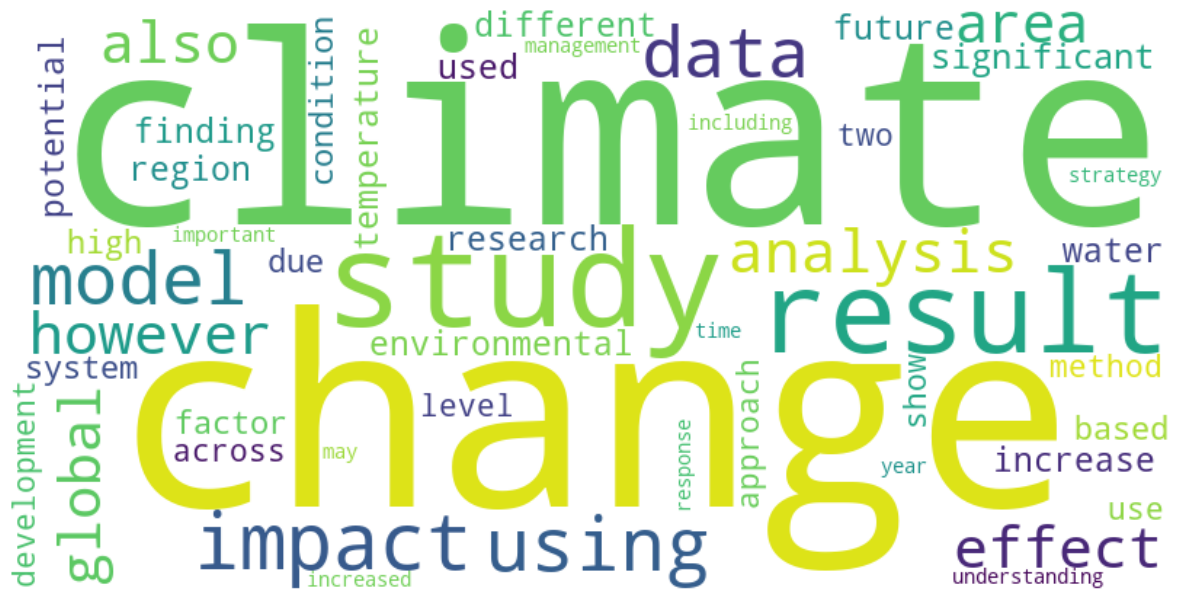

In [17]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=50,
    colormap='viridis'
).generate_from_frequencies(contagem_de_termos_por_texto_ordenado)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig(f"Nuvem de palavras das mudanças climaticas.png", bbox_inches='tight')
plt.show()

## Contagem de termos específicos

In [18]:
def contar_textos_por_termo(lista_termos, lista_textos):
    contagem_termos = defaultdict(int, {termo: 0 for termo in lista_termos})

    for texto in lista_textos:
        texto = texto.lower()
        
        for termo in lista_termos:
            if termo.lower() in texto:
                contagem_termos[termo] += 1

    return dict(contagem_termos)

In [19]:
lista_termos_especificos = ['food security', 'tomato', 'cherry tomato'
                            ,'micronutrient','nutrient','protein','fiber'
                            ,'mineral','fat','ash','moisture', 'vitamin'
                            ,'carbohydrate']

In [20]:
contagem_de_termos_especificos = contar_textos_por_termo(lista_termos_especificos, lista_abstracts_2024)

dic_barras_especificas = {}
for palavra in lista_termos_especificos:
    counts_on_articles = contagem_de_termos_especificos[palavra]
    dic_barras_especificas[palavra] = 100 * counts_on_articles/len(lista_abstracts_2024)

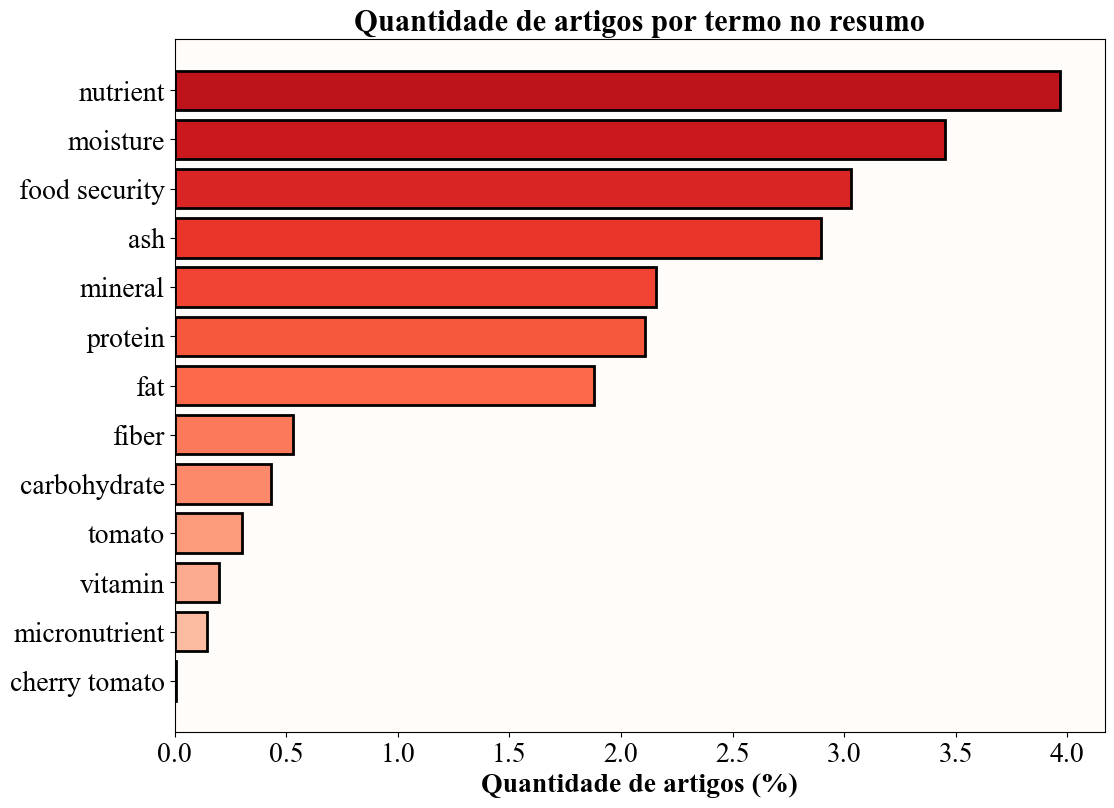

In [21]:
plotar_grafico_barras(dic_barras_especificas, lista_termos_especificos, save=True)

## Gráfico com mais de uma figura

In [22]:
def plotar_figura_multiplos_graficos_lado_a_lado(lista_contagem_termos, titulos):
    """
    Plota múltiplos gráficos de barras lado a lado, com base nas contagens de termos fornecidas.
    
    Args:
        lista_contagem_termos (list[dict]): Lista de dicionários, onde cada dicionário contém
            termos como chaves e suas contagens como valores.
        titulos (list[str]): Lista de títulos para os gráficos correspondentes a cada conjunto
            de contagem de termos.
    
    Observações:
        - Cada gráfico de barras é gerado horizontalmente e é estilizado com um esquema de cores
          definido.
        - As barras são invertidas para exibir os termos mais relevantes no topo.
        - Os gráficos têm títulos, rótulos para os eixos e percentuais são calculados em relação
          ao tamanho total de `lista_abstracts_2024` (que deve estar disponível no escopo).
        - Letras indicativas (A), B), C), etc.) são adicionadas no canto superior esquerdo de cada gráfico.
    """
    num_graficos = len(lista_contagem_termos)
    
    fig, axes = plt.subplots(1, num_graficos, figsize=(12 * num_graficos, 10), facecolor="#FFFCF9")
    
    plt.rc('font', family='Times New Roman')
    
    if num_graficos == 1:
        axes = [axes]
    
    letras = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']
    
    for i, (contagem_termos, ax) in enumerate(zip(lista_contagem_termos, axes)):
        termos_ordenados = sorted(contagem_termos.items(), key=lambda x: x[1], reverse=True)
        
        palavras = [item[0] for item in termos_ordenados]
        frequencias = [100 * item[1]/len(lista_abstracts_2024) for item in termos_ordenados]
        
        bars = ax.barh(palavras, frequencias, edgecolor='black', linewidth=2)
        
        ax.invert_yaxis()
        
        ax.set_facecolor('#FFFCF9')
        
        ax.set_title(titulos[i], fontsize=24)
        ax.set_xlabel('Quantidade de artigos (%)', fontsize=22)
        ax.set_ylabel('Termos', fontsize=22)
        
        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        
        cmap = plt.get_cmap('YlOrBr')
        for j, bar in enumerate(bars):
            bar.set_color(cmap(np.linspace(0.8, 0.3, len(bars)))[j])
            bar.set_edgecolor('black')
            bar.set_linewidth(2)
        
        
        ax.text(-0.1, 1.05, letras[i], transform=ax.transAxes, fontsize=22, 
                fontweight='bold', va='top', ha='right')

    plt.tight_layout()
    plt.savefig("Quantidade de artigo em contextos especificos.png")
    plt.show()

In [23]:
lista_dics = [dic_elementos_2024, dic_vitaminas_2024_filtrado]

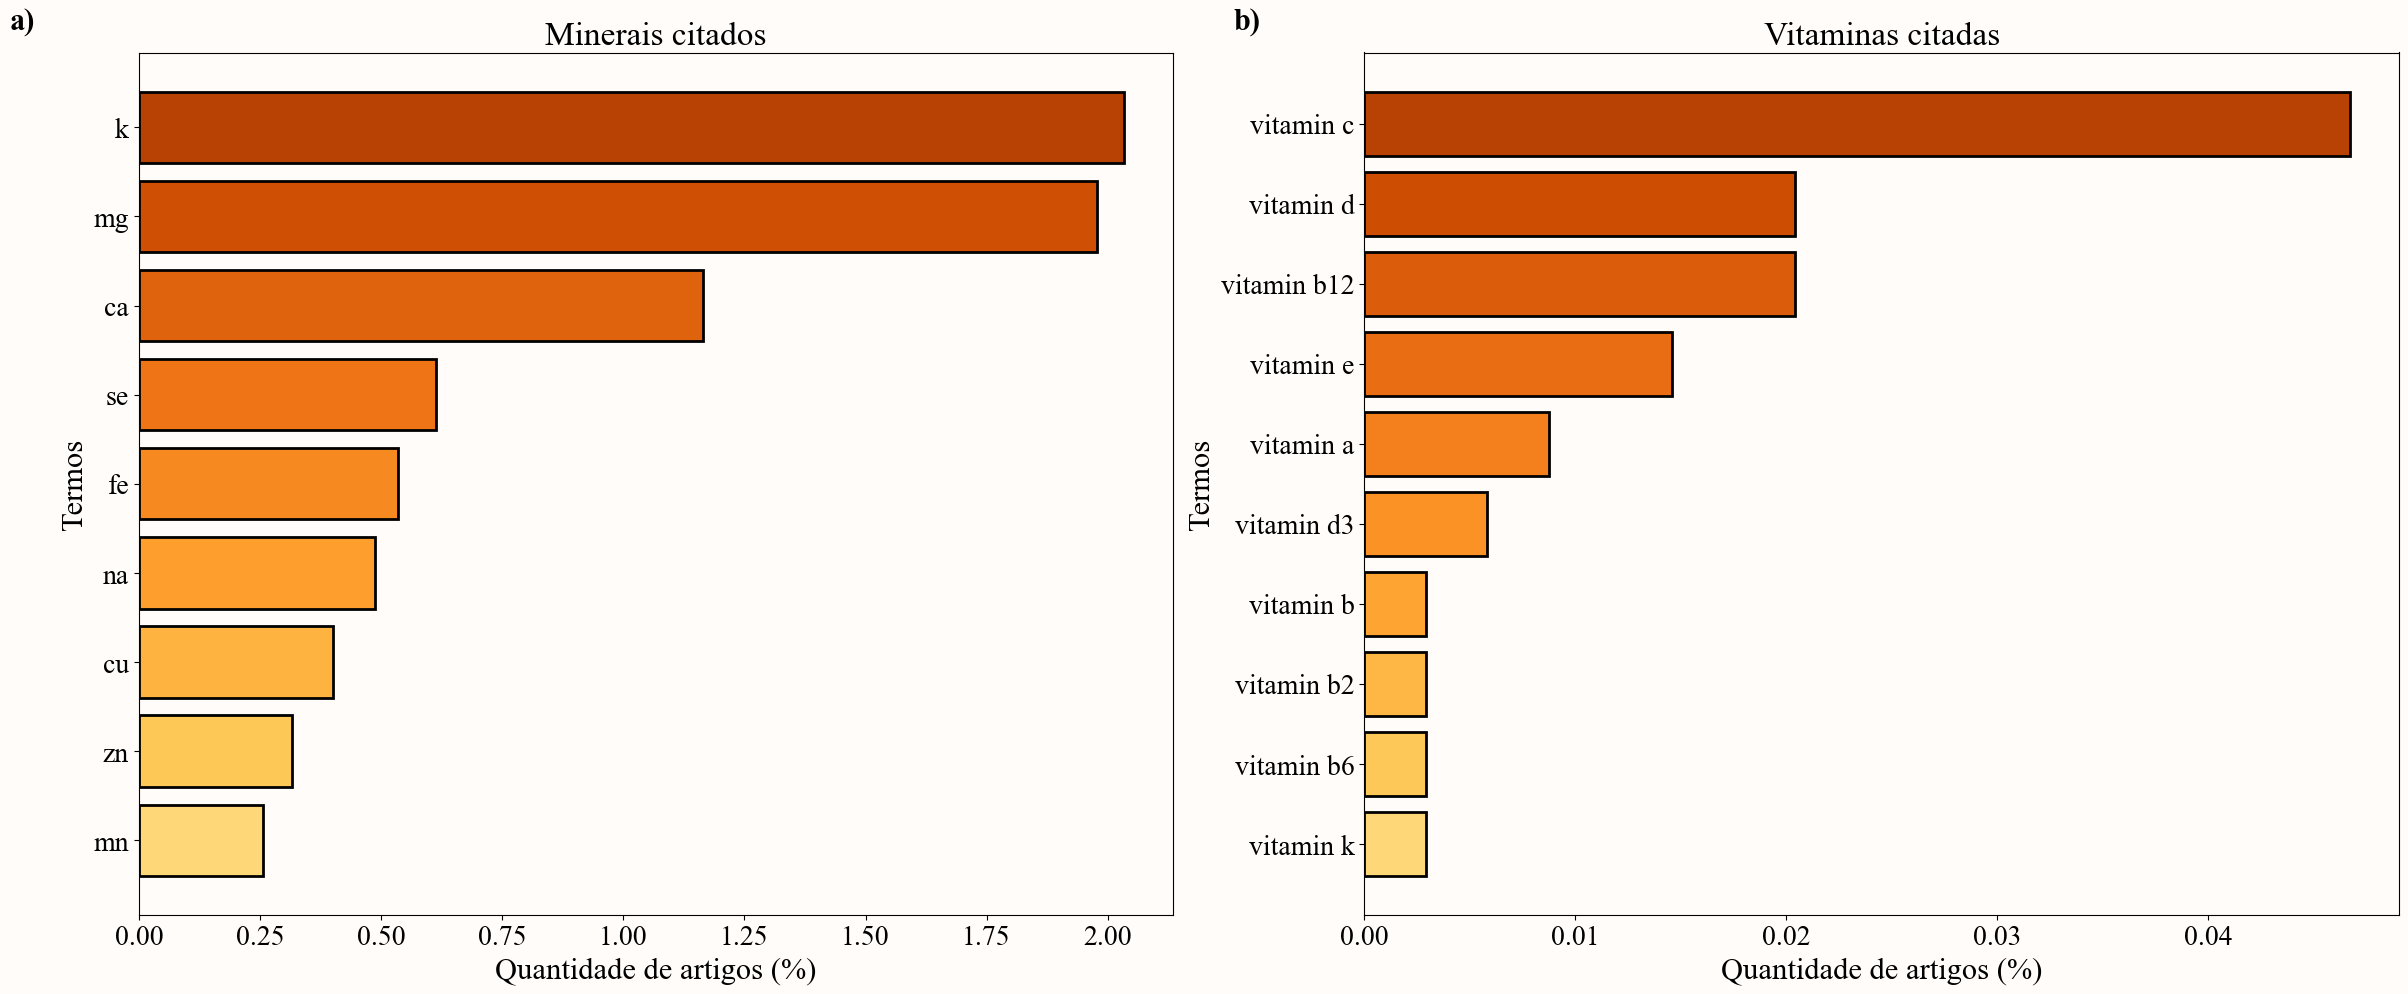

In [24]:
titulos = [
    'Minerais citados',
    'Vitaminas citadas'
]

# Chamando a função com os exemplos
plotar_figura_multiplos_graficos_lado_a_lado(lista_dics, titulos)

## Buscando artigos

In [25]:
lista_titulos_2024 = list(climate_change_2024_df["Article Title"])

In [26]:
def encontrar_titulos_com_termos(termos, lista_textos, lista_titulos):
    """
    Retorna um dicionário com os títulos dos artigos em que os termos específicos aparecem no texto.

    Args:
    termos (list of str): Lista de termos que deseja procurar nos textos.
    lista_textos (list of str): Lista de textos (resumos dos artigos) onde os termos serão procurados.
    lista_titulos (list of str): Lista de títulos correspondentes aos textos dos artigos.

    Retorna:
    dict: Um dicionário onde as chaves são os termos e os valores são listas de títulos de artigos que contêm o termo.
    """
    termos_dict = {termo: [] for termo in termos}
    
    # Itera pelos textos e títulos
    for texto, titulo in zip(lista_textos, lista_titulos):
        texto = texto.lower()
        for termo in termos:
            termo_lower = termo.lower()
            if termo_lower in texto:
                termos_dict[termo].append(titulo)
    
    return termos_dict

resultados = encontrar_titulos_com_termos(['cherry tomato'], lista_abstracts_2024, lista_titulos_2024)

for termo, titulos in resultados.items():
    print(f"Termo: {termo}")
    print("Títulos dos artigos que contêm o termo:")
    for titulo in titulos:
        print(f"- {titulo}")
    print()

Termo: cherry tomato
Títulos dos artigos que contêm o termo:
- Reconnoitering the impact of corporate governance on carbon emission disclosure in an emerging setting
- Heat exposure mitigation in renovated nearly zero-energy dwellings during concurrent heat waves and power outages

